In [1]:
import geopandas as gpd 
import pandas as pd 
from geopy.distance import distance
import pysal

/home/sagar/anaconda3/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"


In [2]:
cities = pd.read_csv('scratchpad/major_towns_and_cities__december_2015__boundaries.csv')

In [3]:
cities.head()

,objectid,tcity15cd,tcity15nm,st_areashape,st_lengthshape
0,1,J01000001,Barnsley,2.568247e+07,115099.860000
1,2,J01000002,Basildon,2.551499e+07,119299.838000
2,3,J01000003,Basingstoke,2.918502e+07,93900.388003
3,4,J01000004,Bath,2.423750e+07,92099.940000
4,5,J01000005,Bedford,2.016749e+07,71300.186000


In [4]:
cities_shp = gpd.read_file('scratchpad/Major_Towns_and_Cities__December_2015__Boundaries.shp')

In [5]:
len(cities)

112

In [6]:
cities_shp.head()

,objectid,tcity15cd,tcity15nm,st_areasha,st_lengths,geometry
0,1,J01000001,Barnsley,2.568247e+07,115099.860000,POLYGON ((-1.514195344620359 53.59640349073459...
1,2,J01000002,Basildon,2.551499e+07,119299.838000,(POLYGON ((0.4782626977874766 51.5957154637567...
2,3,J01000003,Basingstoke,2.918502e+07,93900.388003,POLYGON ((-1.046246512364562 51.29204680633934...
3,4,J01000004,Bath,2.423750e+07,92099.940000,(POLYGON ((-2.378057667799661 51.4063619586439...
4,5,J01000005,Bedford,2.016749e+07,71300.186000,(POLYGON ((-0.4964790595325217 52.136020921650...


In [7]:
cities_shp['centroid'] = cities_shp['geometry'].centroid

In [8]:
cities_shp.head()

,objectid,tcity15cd,tcity15nm,st_areasha,st_lengths,geometry,centroid
0,1,J01000001,Barnsley,2.568247e+07,115099.860000,POLYGON ((-1.514195344620359 53.59640349073459...,POINT (-1.478661476787815 53.56452434724935)
1,2,J01000002,Basildon,2.551499e+07,119299.838000,(POLYGON ((0.4782626977874766 51.5957154637567...,POINT (0.4645335386141249 51.57583728530054)
2,3,J01000003,Basingstoke,2.918502e+07,93900.388003,POLYGON ((-1.046246512364562 51.29204680633934...,POINT (-1.097496441164968 51.26384867383135)
3,4,J01000004,Bath,2.423750e+07,92099.940000,(POLYGON ((-2.378057667799661 51.4063619586439...,POINT (-2.363556484502424 51.38197391633775)
4,5,J01000005,Bedford,2.016749e+07,71300.186000,(POLYGON ((-0.4964790595325217 52.136020921650...,POINT (-0.4562337747453529 52.1411436668283)


In [9]:
city_values = pd.read_csv('scratchpad/city_over_dosage.csv')

In [10]:
merged = pd.merge(left=cities_shp , right=city_values , left_on='tcity15nm' , right_on='city')

In [11]:
len(merged)

109

In [12]:
merged

,objectid,tcity15cd,tcity15nm,st_areasha,st_lengths,geometry,centroid,Unnamed: 0,IMD,city,dosage,over,population
0,1,J01000001,Barnsley,2.568247e+07,115099.860000,POLYGON ((-1.514195344620359 53.59640349073459...,POINT (-1.478661476787815 53.56452434724935),21,27.7550,Barnsley,15.982024,10.432552,11.435569
1,2,J01000002,Basildon,2.551499e+07,119299.838000,(POLYGON ((0.4782626977874766 51.5957154637567...,POINT (0.4645335386141249 51.57583728530054),60,30.6180,Basildon,15.667804,10.665695,11.601119
2,3,J01000003,Basingstoke,2.918502e+07,93900.388003,POLYGON ((-1.046246512364562 51.29204680633934...,POINT (-1.097496441164968 51.26384867383135),48,11.3000,Basingstoke,15.117340,10.576835,11.594579
3,4,J01000004,Bath,2.423750e+07,92099.940000,(POLYGON ((-2.378057667799661 51.4063619586439...,POINT (-2.363556484502424 51.38197391633775),80,8.8000,Bath,14.752446,9.485318,11.473706
4,5,J01000005,Bedford,2.016749e+07,71300.186000,(POLYGON ((-0.4964790595325217 52.136020921650...,POINT (-0.4562337747453529 52.1411436668283),11,22.8090,Bedford,15.042975,9.545470,11.411823
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,108,J01000108,Woking,2.908998e+07,92799.937100,POLYGON ((-0.6385313228553464 51.3302791449334...,POINT (-0.5564883490764387 51.32174153933283),52,7.3835,Woking,14.897730,10.562994,11.522430
105,109,J01000109,Wolverhampton,5.932501e+07,131300.020000,(POLYGON ((-2.208060028029861 52.5854881465526...,POINT (-2.130277576225546 52.59088719683045),71,29.1545,Wolverhampton,16.484235,10.801623,12.378352
106,110,J01000110,Worcester,2.423248e+07,89800.048000,(POLYGON ((-2.223019921831334 52.1880947865328...,POINT (-2.212316035949851 52.19674672193875),79,15.9515,Worcester,15.582158,10.835958,11.528838
107,111,J01000111,Worthing,2.458249e+07,47000.022000,POLYGON ((-0.4030605558371606 50.8551761518749...,POINT (-0.3999191498898998 50.8240558129169),97,14.8450,Worthing,15.848689,10.066866,11.609453


In [13]:
weightMatrix = np.zeros((len(merged) , len(merged)))
for i , row_i in merged.iterrows():
    for j , row_j in merged.iterrows():
        weightMatrix[i][j] = 1/(distance((row_i['centroid'].y , row_i['centroid'].x),(row_j['centroid'].y , row_j['centroid'].x)).km+0.0001)**2

In [14]:
weightMatrix

array([[1.00000000e+08, 1.50784999e-05, 1.51029382e-05, ...,
        3.90515038e-05, 1.01605244e-05, 3.80849710e-04],
       [1.50784999e-05, 1.00000000e+08, 7.68587765e-05, ...,
        2.58158892e-05, 9.39353550e-05, 1.22690762e-05],
       [1.51029382e-05, 7.68587765e-05, 1.00000000e+08, ...,
        5.98610998e-05, 2.08894568e-04, 1.10889725e-05],
       ...,
       [3.90515038e-05, 2.58158892e-05, 5.98610998e-05, ...,
        1.00000000e+08, 2.55420592e-05, 2.25794631e-05],
       [1.01605244e-05, 9.39353550e-05, 2.08894568e-04, ...,
        2.55420592e-05, 1.00000000e+08, 8.05488291e-06],
       [3.80849710e-04, 1.22690762e-05, 1.10889725e-05, ...,
        2.25794631e-05, 8.05488291e-06, 1.00000000e+08]])

In [15]:
weightMatrix = {}
thresh = 20
for i , row_i in merged.iterrows():
    weightMatrix[i] = {}
    for j , row_j in merged.iterrows():
        dist = distance((row_i['centroid'].y , row_i['centroid'].x),(row_j['centroid'].y , row_j['centroid'].x)).km + 0.0001
        if dist < thresh:
#             weightMatrix[i][j] = 1/dist
            weightMatrix[i][j] = 1
        else:
            weightMatrix[i][j] = 0

In [16]:
merged.iloc[0]['centroid'].x

-1.4786614767878152

In [17]:
# distance((merged.iloc[0]['centroid'].y , merged.iloc[0]['centroid'].x),(merged.iloc[5]['centroid'].y , merged.iloc[5]['centroid'].x)).km

In [18]:
Z_rand = merged.over

In [19]:
from esda.moran import Moran
from libpysal.weights.contiguity import Queen
from libpysal import examples
from libpysal.examples import available

In [20]:
from libpysal.weights import W

In [21]:
weights = W(weightMatrix)

In [22]:
weightMatrix

{0: {0: 1,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 0,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 0,
  30: 0,
  31: 0,
  32: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  39: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 0,
  51: 0,
  52: 0,
  53: 0,
  54: 0,
  55: 0,
  56: 0,
  57: 0,
  58: 0,
  59: 0,
  60: 0,
  61: 0,
  62: 0,
  63: 0,
  64: 0,
  65: 0,
  66: 0,
  67: 0,
  68: 0,
  69: 0,
  70: 0,
  71: 0,
  72: 0,
  73: 0,
  74: 0,
  75: 0,
  76: 1,
  77: 0,
  78: 0,
  79: 0,
  80: 0,
  81: 0,
  82: 0,
  83: 0,
  84: 0,
  85: 0,
  86: 0,
  87: 0,
  88: 0,
  89: 0,
  90: 0,
  91: 0,
  92: 0,
  93: 0,
  94: 0,
  95: 0,
  96: 0,
  97: 1,
  98: 0,
  99: 0,
  100: 0,
  101: 0,
  102: 0,
  103: 0,
  104: 0,
  105: 0,
  106: 0,
  107: 0,
  108: 0},
 1: {0: 0,
  1: 

In [190]:
mi = Moran(Z_rand, weights,permutations=1000)

# Verify Moran's I results
print(mi.I)
# print(mi.p_rand)
# print(mi.p_norm)
print(mi.p_sim)
# print(mi.z_norm)
# print(mi.z_rand)
print(mi.z_sim)

8.681775000742606e-32
0.3276723276723277
-0.3668257672589627


/home/sagar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,"Moran's I")

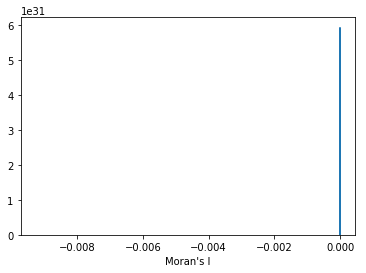

In [191]:
import seaborn as sbn    #visualize the results of Moran's I 
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 100, color='r')
plt.vlines(mi.EI, 0,100)
plt.xlabel("Moran's I")

In [115]:
import libpysal
import csv
from libpysal.weights import lat2W
from esda.moran import Moran
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

data1=weightMatrix #example 3x3 array
w = lat2W(3,3, id_type='float',)
mi = Moran(data1,  w)

import seaborn as sbn    #visualize the results of Moran's I 
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 100, color='r')
plt.vlines(mi.EI, 0,100)
plt.xlabel("Moran's I")

TypeError: unsupported operand type(s) for /: 'dict' and 'int'